In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Create a dataframe with dev.json
dev = pd.read_json('SPEGQL-dataset/dataset/dev.json')

In [3]:
# Show me the first 5 rows
dev.head()

,query,schemaId,question
0,query { ship_aggregate ( where : { disposition...,battle_death,How many ships ended up being 'Captured'?
1,query { ship ( order_by : { name : desc } ) { ...,battle_death,List the name and tonnage ordered by in descen...
2,query { battle { name date } },battle_death,"List the name, date and result of each battle."
3,query { death_aggregate { aggregate { max { ki...,battle_death,What is maximum and minimum death toll caused ...
4,query { death_aggregate { aggregate { avg { in...,battle_death,What is the average number of injuries caused ...


In [4]:
# Do we have any missing values - no
dev.isnull().sum()


query       0
schemaId    0
question    0
dtype: int64

Average length of questions:  63.238267148014444
Minimum question length:  18
Maximum question length:  137
Median question length:  61.0


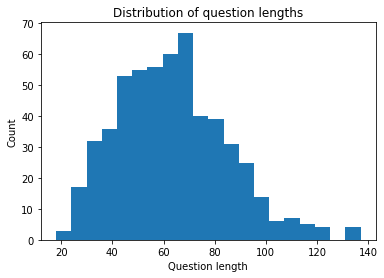

Short        140
Long         140
Medium       138
Very Long    135
Name: question_length_bucket, dtype: int64
Quartiles of question length:
 0.00     18.0
0.25     47.0
0.50     61.0
0.75     77.0
1.00    137.0
Name: question, dtype: float64

Count of questions in each bucket:
 Short        140
Long         140
Medium       138
Very Long    135
Name: question_length_bucket, dtype: int64


,query,schemaId,question,question_length,question_length_bucket
0,query { ship_aggregate ( where : { disposition...,battle_death,How many ships ended up being 'Captured'?,41,Short
1,query { ship ( order_by : { name : desc } ) { ...,battle_death,List the name and tonnage ordered by in descen...,83,Very Long
2,query { battle { name date } },battle_death,"List the name, date and result of each battle.",46,Short
3,query { death_aggregate { aggregate { max { ki...,battle_death,What is maximum and minimum death toll caused ...,56,Medium
4,query { death_aggregate { aggregate { avg { in...,battle_death,What is the average number of injuries caused ...,56,Medium


In [5]:
# create a pandas Series of the question column
questions = dev['question']

# calculate the average length of the questions
avg_length = questions.str.len().mean()
min_length = questions.str.len().min()
max_length = questions.str.len().max()
median_length = questions.str.len().median()

# print out the average length of the questions
print("Average length of questions: ", avg_length)

# calculate and print out the minimum and maximum question lengths
print("Minimum question length: ", min_length)
print("Maximum question length: ", max_length)

# calculate and print out the median question length
print("Median question length: ", median_length)

# plot a histogram of the question lengths
plt.hist(questions.str.len(), bins=20)
plt.xlabel('Question length')
plt.ylabel('Count')
plt.title('Distribution of question lengths')
plt.show()

# calculate the quartiles of question length
quartiles = questions.str.len().quantile([0, 0.25, 0.5, 0.75, 1])

dev['question_length'] = questions.str.len()

# create a new column in the dataframe to represent the question length bucket
dev['question_length_bucket'] = pd.cut(questions.str.len(), bins=quartiles, labels=['Short', 'Medium', 'Long', 'Very Long'])

# print out the count of questions in each bucket
print(dev['question_length_bucket'].value_counts())

# create a new column in the dataframe to represent the question length bucket
dev['question_length_bucket'] = pd.cut(questions.str.len(), bins=quartiles, labels=['Short', 'Medium', 'Long', 'Very Long'])

# print out the quartiles and count of questions in each bucket
print("Quartiles of question length:\n", quartiles)
print("\nCount of questions in each bucket:\n", dev['question_length_bucket'].value_counts())

dev.head()


## Dataset

In [6]:
#Create a function that takes the dataset and check if there's duplicate queries
def check_duplicate_queries(df):
    queries = df['query'].tolist()
    return len(queries) == len(set(queries))

check_duplicate_queries(dev)

False

Mean nesting level: 3.148014440433213
Median nesting level: 3.0
Minimum nesting level: 2
Maximum nesting level: 6


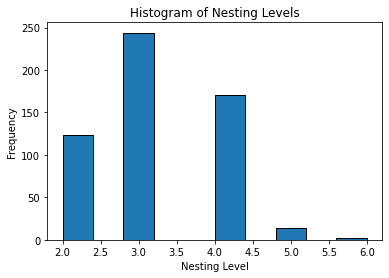

Nesting level 2 123
Nesting level 3 244
Nesting level 4 171
Nesting level 5 14
Nesting level 6 2


,query,schemaId,question,question_length,question_length_bucket,nesting_level
0,query { ship_aggregate ( where : { disposition...,battle_death,How many ships ended up being 'Captured'?,41,Short,3
1,query { ship ( order_by : { name : desc } ) { ...,battle_death,List the name and tonnage ordered by in descen...,83,Very Long,2
2,query { battle { name date } },battle_death,"List the name, date and result of each battle.",46,Short,2
3,query { death_aggregate { aggregate { max { ki...,battle_death,What is maximum and minimum death toll caused ...,56,Medium,4
4,query { death_aggregate { aggregate { avg { in...,battle_death,What is the average number of injuries caused ...,56,Medium,4


In [7]:
import re

# Function to calculate the nesting level of a query
def nesting_level(query):
    query = re.sub(r'\s+', '', query)  # Remove whitespace
    max_nesting = 0
    current_nesting = 0

    for char in query:
        if char == '{':
            current_nesting += 1
            max_nesting = max(max_nesting, current_nesting)
        elif char == '}':
            current_nesting -= 1

    return max_nesting

# Calculate the nesting level for each query and add it as a new column
dev['nesting_level'] = dev['query'].apply(nesting_level)
# create a new column in the dataframe to represent the nesting level bucket

# calculate the mean, median, min, and max of nesting levels
mean_nesting = dev['nesting_level'].mean()
median_nesting = dev['nesting_level'].median()
min_nesting = dev['nesting_level'].min()
max_nesting = dev['nesting_level'].max()

print(f"Mean nesting level: {mean_nesting}")
print(f"Median nesting level: {median_nesting}")
print(f"Minimum nesting level: {min_nesting}")
print(f"Maximum nesting level: {max_nesting}")

# plot a histogram of the nesting levels
plt.hist(dev['nesting_level'], edgecolor='black')
plt.xlabel('Nesting Level')
plt.ylabel('Frequency')
plt.title('Histogram of Nesting Levels')
plt.show()

dev[dev['nesting_level'] == 2].shape[0]
print("Nesting level 2 " + str(dev[dev['nesting_level'] == 2].shape[0]))
print("Nesting level 3 " + str(dev[dev['nesting_level'] == 3].shape[0]))
print("Nesting level 4 " + str(dev[dev['nesting_level'] == 4].shape[0]))
print("Nesting level 5 " + str(dev[dev['nesting_level'] == 5].shape[0]))
print("Nesting level 6 " + str(dev[dev['nesting_level'] == 6].shape[0]))

dev.head()


In [30]:
import re

def count_graphql_arguments(query: str) -> int:
    # Removing white spaces and escape characters
    query = re.sub(r'\s|\\', '', query)
    
    # Regular expression to find arguments in the query
    pattern = re.compile(r'(\{[^\{]*\})')
    matches = pattern.findall(query)

    # Counting the number of arguments
    count = 0
    for match in matches:
        count += match.count(':')
    return count

dev['num_args'] = dev['query'].apply(count_query_arguments)

test = False
stats = False

if test:
    query1 = 'query{teacher(where:{_or:[{age:{_eq:\"32\"}},{age:{_eq:\"33\"}}]}){name}}'
    print(count_graphql_arguments(query1))  # Output: 2
    query2 = 'query { templates ( where : { _and : [ { template_type_code : { _neq : "PP" } } , { template_type_code : { _neq : "PPT" } } ] } ) { template_id template_type_code } }'
    print(count_graphql_arguments(query2))  # Output: 2
    query3 = 'query { countrylanguage ( where : { language : { _neq : \"French\" } } , distinct_on : countrycode ) { countrycode } }'
    print(count_graphql_arguments(query3))  # Output: 2
    query4 = 'query { matches_aggregate { aggregate { count } } }'
    print(count_graphql_arguments(query4))  # Output: 0
    query5 = 'query{singer_aggregate(where:{country:{_eq:\"France\"}}){aggregate{avg{age}min{age}max{age}}}}'
    print(count_graphql_arguments(query5))  # Output: 1
    query6 = 'query { tv_channel_aggregate ( where : { language : { _eq : \"English\" } } ) { aggregate { count } } }'
    print(count_graphql_arguments(query6))  # Output: 1
    query7 = '{ conductor ( where : { orchestras : { year_of_founded : { _gt : 2008.0 } } } ) { name } }'
    print(count_graphql_arguments(query7))  # Output: 1
    query8 = '{ flights_aggregate ( where : { sourceairport : { _eq : \"APG\" } } ) { aggregate { count } } }'
    print(count_graphql_arguments(query8))  # Output: 1
    query9 = '{ poker_player_aggregate ( where : { earnings : { _lt : 200000.0 } } ) { aggregate { max { final_table_made } } } }'
    print(count_graphql_arguments(query9))  # Output: 1
    query10 = '{ country_aggregate ( where : { _and : { continent : { _eq : \"Africa\" } , governmentform : { _eq : \"Republic\" } } } ) { aggregate { avg { lifeexpectancy } } } }'
    print(count_graphql_arguments(query10))  # Output: 2
    query11 = '{ matches_aggregate ( where : { _and : { winner_hand : { _eq : \"L\" } , tourney_name : { _eq : \"WTA Championships\" } } } ) { aggregate { count } } }'
    print(count_graphql_arguments(query11))  # Output: 2
    query12 =  '{ paragraphs_aggregate ( where : { document : { document_name : { _eq : \"Summer Show\" } } } ) { aggregate { count } } }'
    print(count_graphql_arguments(query12))  # Output: 1

if stats:
    dev['num_args'].hist()

    print(dev['num_args'].min())
    print(dev['num_args'].max())

    print(dev['num_args'].mean())
    print(dev['num_args'].median())


0
3
0.8664259927797834
1.0


,query,schemaId,question,question_length,question_length_bucket,nesting_level,num_args
0,query { ship_aggregate ( where : { disposition...,battle_death,How many ships ended up being 'Captured'?,41,Short,3,1
1,query { ship ( order_by : { name : desc } ) { ...,battle_death,List the name and tonnage ordered by in descen...,83,Very Long,2,1
2,query { battle { name date } },battle_death,"List the name, date and result of each battle.",46,Short,2,0
3,query { death_aggregate { aggregate { max { ki...,battle_death,What is maximum and minimum death toll caused ...,56,Medium,4,0
4,query { death_aggregate { aggregate { avg { in...,battle_death,What is the average number of injuries caused ...,56,Medium,4,0


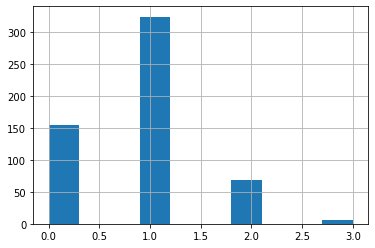

In [15]:
# dev = pd.read_json('dataset/dev.json')
dev['num_args'] = dev['query'].apply(count_graphql_arguments)

dev['num_args'].hist()

print(dev['num_args'].min())
print(dev['num_args'].max())

print(dev['num_args'].mean())
print(dev['num_args'].median())

dev.head()

In [11]:
# x = 'query { user(id: 123) { name email } }'

# count_query_arguments(x)

# y = "query { user(id: 123) { name email posts(status: PUBLISHED, orderBy: {field: CREATED_AT, direction: DESC}, limit: 10) { title body comments(limit: 5, orderBy: {field: CREATED_AT, direction: ASC}) { author { name } content } } followers(limit: 20) { name email } } }"

query1 = 'query{teacher(where:{_or:[{age:{_eq:\"32\"}},{age:{_eq:\"33\"}}]}){name}}'
query2 =  'query { templates ( where : { _and : [ { template_type_code : { _neq : "PP" } } , { template_type_code : { _neq : "PPT" } } ] } ) { template_id template_type_code } }'
query3 = 'query { countrylanguage ( where : { language : { _neq : \"French\" } } , distinct_on : countrycode ) { countrycode } }',
query4 = 'query { matches_aggregate { aggregate { count } } }',
query5 = 'query{singer_aggregate(where:{country:{_eq:\"France\"}}){aggregate{avg{age}min{age}max{age}}}}',

count_query_arguments(query1) # Something is wrong here - there's more than 3 arguments in this one
count_query_arguments(query2) # 



4

### Schemas

I wish to know how many schemas we have. 

I want to create a dataframe of all of my schemas. In the first column I want to know the id of the schema
In the second row I want to know the length of the schema

Create a dataframe with the columns schemaId, schema_complexity and schema_complexity. 
schema_complexity and schema lenght should be blank for now. 

I have a folder called Schemas wherein there is larger number of schemas. 
To populate schemaId I want you to loop over all the folders in the Schemas folder, and use the folder names as the schemaId in the dataframe

For every schema folder in the Schemas folder there's a file called schemas.json. I want you to count how long this file is and populate the scehma length wtih this length

In [144]:
# import os
# import pandas as pd

# # Create an empty DataFrame with the specified columns
# data = {'schemaId': [], 'schema_complexity': [], 'schema_complexity': []}
# df = pd.DataFrame(data)

# # Loop over all folders within the "Schemas" folder
# schemas_folder = 'SPEGQL-dataset/Schemas'
# schema_folders = sorted(os.listdir(schemas_folder), key=lambda x: os.path.getmtime(os.path.join(schemas_folder, x)))

# for schema_folder in schema_folders:
#     if os.path.isdir(os.path.join(schemas_folder, schema_folder)):
#         # Read the schema.json file and count the number of lines
#         with open(os.path.join(schemas_folder, schema_folder, 'schema.json'), 'r') as schema_file:
#             schema_length = sum(1 for line in schema_file)

#         # Append the schemaId and schema_complexity to the DataFrame
#         new_row = pd.DataFrame({'schemaId': [schema_folder], 'schema_complexity': [schema_length]})
#         df = pd.concat([df, new_row], ignore_index=True)

# print(df)


In [145]:
# # Find the schema with the maximum length
# max_length = df['schema_complexity'].max()
# max_length_schema = df[df['schema_complexity'] == max_length]['schemaId'].values[0]

# print(f"Schema with maximum length: {max_length_schema} ({max_length} lines)")

# # Find the schema with the minimum length
# min_length = df['schema_complexity'].min()
# min_length_schema = df[df['schema_complexity'] == min_length]['schemaId'].values[0]

# print(f"Schema with minimum length: {min_length_schema} ({min_length} lines)")


In [146]:
def analyze_schema_complexity(schema_json):
    types_count = 0
    fields_count = 0
    input_objects_count = 0
    relationships_count = 0
    arguments_count = 0

    for type_ in schema_json["__schema"]["types"]:
        types_count += 1

        if type_["kind"] == "INPUT_OBJECT":
            input_objects_count += 1

        if "fields" in type_ and type_["fields"] is not None:
            for field in type_["fields"]:
                fields_count += 1

                if "args" in field:
                    arguments_count += len(field["args"])
                    relationships_count += 1

    complexity_score = (
        (types_count )
        + (fields_count )
        + (input_objects_count)
        + (relationships_count)
        + (arguments_count)
    )

    schema_length = len(json.dumps(schema_json))

    return complexity_score, types_count, fields_count, input_objects_count, relationships_count, arguments_count, schema_length

# Load your GraphQL schema JSON file
import json

with open("SPEGQL-dataset/Schemas/activity_1/schema.json", "r") as file:
    schema_json = json.load(file)

complexity_score, types_count, fields_count, input_objects_count, relationships_count, arguments_count, schema_length = analyze_schema_complexity(schema_json)

## Call the function on all schemas and add the counts and complexity score to the DataFrame
for schema_folder in schema_folders:
    if os.path.isdir(os.path.join(schemas_folder, schema_folder)):
        with open(os.path.join(schemas_folder, schema_folder, 'schema.json'), 'r') as schema_file:
            schema_json = json.load(schema_file)
            complexity_score, types_count, fields_count, input_objects_count, relationships_count, arguments_count, schema_length = analyze_schema_complexity(schema_json)
            df.loc[df['schemaId'] == schema_folder, 'schema_total_complexity'] = complexity_score
            df.loc[df['schemaId'] == schema_folder, 'schema_types_count'] = types_count
            df.loc[df['schemaId'] == schema_folder, 'schema_fields_count'] = fields_count
            df.loc[df['schemaId'] == schema_folder, 'schema_input_objects_count'] = input_objects_count
            df.loc[df['schemaId'] == schema_folder, 'schema_relationships_count'] = relationships_count
            df.loc[df['schemaId'] == schema_folder, 'schema_arguments_count'] = arguments_count
            df.loc[df['schemaId'] == schema_folder, 'schema_length'] = schema_length

df.head()

,schemaId,schema_complexity,schema_total_complexity,schema_types_count,schema_fields_count,schema_input_objects_count,schema_relationships_count,schema_arguments_count,schema_length
1,activity_1,13960.0,1150.0,196.0,325.0,98.0,325.0,206.0,217425.0
3,allergy_1,7936.0,631.0,108.0,179.0,50.0,179.0,115.0,123931.0
5,architecture,9965.0,791.0,130.0,234.0,63.0,234.0,130.0,152333.0
8,battle_death,9770.0,779.0,129.0,229.0,62.0,229.0,130.0,149243.0
11,body_builder,7207.0,560.0,91.0,178.0,41.0,178.0,72.0,111148.0


In [147]:
## Test 

# Sample GraphQL schema in JSON format
sample_schema = {
    "__schema": {
        "types": [
            {
                "kind": "OBJECT",
                "name": "query_root",
                "fields": [
                    {
                        "name": "author",
                        "args": [
                            {"name": "limit"},
                            {"name": "offset"},
                            {"name": "order_by"},
                            {"name": "where"},
                        ],
                    },
                    {
                        "name": "author_aggregate",
                        "args": [
                            {"name": "distinct_on"},
                            {"name": "limit"},
                            {"name": "offset"},
                            {"name": "order_by"},
                        ],
                    },
                ],
            },
            {
                "kind": "OBJECT",
                "name": "author",
                "fields": [
                    {"name": "id"},
                    {"name": "name"},
                    {"name": "birthdate"},
                ],
            },
            {
                "kind": "INPUT_OBJECT",
                "name": "author_bool_exp",
            },
        ],
    },
}

# Run the analyze_schema_complexity function with the sample schema
complexity_score = analyze_schema_complexity(sample_schema)
print("Complexity score:", complexity_score)

Complexity score: (19, 3, 5, 1, 2, 8, 475)


In [148]:
# #It's kinda obvious that schema_complexity is correlated with schema_complexity, since a way to increase the complexity is to add more types, fields, relationships, etc. to the schema.

# ## Print the max complexity score
# max_complexity = df['schema_complexity'].max()
# max_complexity_schema = df[df['schema_complexity'] == max_complexity]['schemaId'].values[0]
# print(f"Schema with maximum complexity: {max_complexity_schema} ({max_complexity})")

# ## What is the min complexity score?
# min_complexity = df['schema_complexity'].min()
# min_complexity_schema = df[df['schema_complexity'] == min_complexity]['schemaId'].values[0]
# print(f"Schema with minimum complexity: {min_complexity_schema} ({min_complexity})")

# ## describe the complexity score
# df['schema_complexity'].describe()

# ## Remove outliers
# df = df[df['schema_complexity'] < 15000]

# #What is the correlation between the schema_complexity and the schema_complexity?
# df.plot.scatter(x='schema_complexity', y='schema_length')

In [149]:
## What is the correlation value between the schema_complexity and the schema_complexity?
df['schema_complexity'].corr(df['schema_complexity'])

1.0

In [150]:
#Combine dev and df on schemaId
dev_df = dev.merge(df, on='schemaId')

print(dev_df.head())

#Covert the schema_complexity to int
# dev_df['schema_complexity'] = dev_df['schema_complexity'].astype(int)

## Export the DataFrame to a CSV file
dev_df.to_csv('dev_df.csv', index=False)

                                               query      schemaId  \
0  query { ship_aggregate ( where : { disposition...  battle_death   
1  query { ship ( order_by : { name : desc } ) { ...  battle_death   
2                     query { battle { name date } }  battle_death   
3  query { death_aggregate { aggregate { max { ki...  battle_death   
4  query { death_aggregate { aggregate { avg { in...  battle_death   

                                            question  question_length  \
0          How many ships ended up being 'Captured'?               41   
1  List the name and tonnage ordered by in descen...               83   
2     List the name, date and result of each battle.               46   
3  What is maximum and minimum death toll caused ...               56   
4  What is the average number of injuries caused ...               56   

  question_length_bucket  nesting_level  num_args  schema_complexity  \
0                  Short              3         3             9770.0

In [17]:
import pandas as pd

## create a dataframe called dev_def_with_results from the csv file dev_def_with_results
dev_df_with_results = pd.read_csv('dev_df_with_results.csv')

dev_df_with_results.head()

#How many rows have exact match of 1?
print(dev_df_with_results['exact_match'].value_counts(normalize=True))

#How how many rows have semantic match of 1?
print(dev_df_with_results['semantic_match'].value_counts(normalize=True))

#Out of all the rows what proportion of the rows have a semantic match of 1?

#print(dev_df_with_results['semantic_match'].value_counts(normalize=True))

#Calculate the accuracy of the semantic match
dev_df_with_results['semantic_match_accuracy'] = dev_df_with_results['semantic_match'] == dev_df_with_results['semantic_match']

#Calculate the accuracy of the exact match

dev_df_with_results['exact_match_accuracy'] = dev_df_with_results['exact_match'] == dev_df_with_results['exact_match']

dev_df_with_results.head()

0    0.618056
1    0.381944
Name: exact_match, dtype: float64
0    0.601852
1    0.398148
Name: semantic_match, dtype: float64


,Unnamed: 0,query,schemaId,question,question_length,question_length_bucket,nesting_level,num_args,schema_complexity,schema_total_complexity,schema_types_count,schema_fields_count,schema_input_objects_count,schema_relationships_count,schema_arguments_count,schema_length,exact_match,semantic_match,predicted_query,semantic_match_accuracy,exact_match_accuracy
0,0,"query { ship_aggregate ( where : { disposition_of_ship : { _eq : ""Captured"" } } ) { aggregate { count } } }",battle_death,How many ships ended up being 'Captured'?,41,Short,3,3,9770.0,779.0,129.0,229.0,62.0,229.0,130.0,149243.0,0,0,"query { ship_aggregate ( where : { tonnage : { _eq : ""Captured"" } } ) { aggregate { count } } }",True,True
1,1,query { ship ( order_by : { name : desc } ) { name tonnage } },battle_death,List the name and tonnage ordered by in descending alphaetical order for the names.,83,Very Long,2,2,9770.0,779.0,129.0,229.0,62.0,229.0,130.0,149243.0,1,1,query { ship ( order_by : { name : desc } ) { name tonnage } },True,True
2,2,query { battle { name date } },battle_death,"List the name, date and result of each battle.",46,Short,2,0,9770.0,779.0,129.0,229.0,62.0,229.0,130.0,149243.0,0,0,query { battle { name date result } },True,True
3,3,query { death_aggregate { aggregate { max { killed } min { killed } } } },battle_death,What is maximum and minimum death toll caused each time?,56,Medium,4,0,9770.0,779.0,129.0,229.0,62.0,229.0,130.0,149243.0,0,0,query { death_aggregate { aggregate { max { tonnage } min { tonnage } } } },True,True
4,4,query { death_aggregate { aggregate { avg { injured } } } },battle_death,What is the average number of injuries caused each time?,56,Medium,4,0,9770.0,779.0,129.0,229.0,62.0,229.0,130.0,149243.0,0,0,query { death_aggregate { aggregate { avg { injury } } } },True,True


In [19]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping to next line
pd.set_option('display.max_colwidth', None)  # Show the full content of each cell

# I have a dataframe with the following columns: schemaId, schema_complexity, schema_total_complexity, schema_types_count, schema_fields_count, schema_input_objects_count, schema_relationships_count, schema_arguments_count, schema_length, exact_match, semantic_match, semantic_match_accuracy, exact_match_accuracy

# Show me the distribution of the of the query length

# Create a new column called query length which is the length of the query

dev_df_with_results['query_length'] = dev_df_with_results['query'].str.len()

import pandas as pd

# Assuming you already have a DataFrame called 'dev_df_with_results'
# Replace 'query_text' with the actual column name containing the queries in your DataFrame

# First, obtain the percentile values
desc = dev_df_with_results['query_length'].describe()
min_val = desc['min']
p25 = desc['25%']
p50 = desc['50%']
p75 = desc['75%']
max_val = desc['max']

# Define a function to filter the DataFrame based on query length and percentile range
def filter_by_percentile(df, col_name, lower_bound, upper_bound):
    return df[(df[col_name] > lower_bound) & (df[col_name] <= upper_bound)]

# Filter and pick 5 random queries for each percentile range
q_min_p25 = filter_by_percentile(dev_df_with_results, 'query_length', min_val, p25).sample(5)
q_p25_p50 = filter_by_percentile(dev_df_with_results, 'query_length', p25, p50).sample(5)
q_p50_p75 = filter_by_percentile(dev_df_with_results, 'query_length', p50, p75).sample(5)
q_p75_max = filter_by_percentile(dev_df_with_results, 'query_length', p75, max_val).sample(5)

# Create a new DataFrame called 'test_queries' and concatenate the selected samples
test_queries = pd.concat([q_min_p25, q_p25_p50, q_p50_p75, q_p75_max], ignore_index=True)

# Select only the columns containing the query text and query length
test_queries = test_queries[['query', 'query_length']]

# Now 'test_queries' DataFrame contains the 20 selected queries and their lengths
test_queries





,query,query_length
0,query { cartoon ( order_by : { title : asc } ) { title } },58
1,query { people_aggregate { aggregate { count } } },50
2,query { teacher ( order_by : { age : asc } ) { name } },55
3,query { employee ( order_by : { age : asc } ) { name } },56
4,query { highschooler { grade } },32
5,"query { country ( limit : 5 , order_by : { surfacearea : desc } ) { name surfacearea } }",88
6,"query { airlines ( where : { country : { _eq : ""USA"" } } ) { airline abbreviation } }",85
7,"query { teacher ( limit : 1 , order_by : { age : asc } ) { hometown } }",71
8,"query { airlines ( where : { abbreviation : { _eq : ""UAL"" } } ) { airline } }",77
9,"query { airports ( where : { airportcode : { _eq : ""AKO"" } } ) { airportname } }",80


#### Generating the test queries

Since I was not able to get access to the evaluation function of Carrera, I needed to implement my own. 
To do this I created semantic parsing. To ensure that this was correct, divided the queries into 4 buckets where the lowest was between min and the 25% quartile, the next was between .....
Then I randomly picked five from each bucket, such that we had samples from across the query length distribution

I then converted these into queries of a different order, such that I could test the evalation finction. 

Here I have taken the queries from above and rewritten them, such that they are semantically the same, but where the order is differnet. 

For each of these 

In [6]:
import pandas as pd

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping to next line
pd.set_option('display.max_colwidth', None)  # Show the full content of each cell

test_queries = [
'query { hiring { employee_id is_full_time shop_id start_from } }',
'query { teacher ( order_by : { age : asc } ) { name } }',
'query { pets ( where : { pet_age : { _gt : 1 } } ) { petid weight } }',
'query { singer_aggregate { aggregate { count } } }',
'query { singer { birth_year citizenship } }',
'query { ref_template_types { template_type_code template_type_description } }',
'query { airports ( where : { city : { _eq : "Anthony" } } ) { airportcode airportname }}',
'query { singer ( where : { song_name : { _like : "%Hey%" } } ) { name country } }',
'query { players ( order_by : { birth_date : asc } ) { first_name last_name } }',
'query { battle ( where : { bulgarian_commander : { _neq : "Boril" } } ) { name result } }',
'query { stadium ( where : { capacity : { _gte : 5000 , _lte : 10000 } } ) { location name } }',
'query { country_aggregate ( where : { continent : { _eq : "Africa" } } ) { aggregate { count } } }',
'query { airlines_aggregate ( where : { country : { _eq : "USA" } } ) { aggregate { count } } }',
'query { airlines_aggregate ( where : { country : { _eq : "USA" } } ) { aggregate { count } } }',
'query { country_aggregate ( where : { governmentform : { _eq : "Republic" } } ) { aggregate { count } } }',
'query { airlines_aggregate ( where : { _and : { flights : { sourceairport : { _eq : "AHD" } } , airline : { _eq : "United Airlines" } } } ) { aggregate { count } } }',
'query { airlines_aggregate ( where : { _and : { airline : { _eq : "United Airlines" } , flights : { destairport : { _eq : "ASY" } } } } ) { aggregate { count } } }',
'query { paragraphs_aggregate ( where : { document : { document_name : { _eq : "Summer Show" } } } ) { aggregate { count } } }',
'query { country_aggregate ( where : { _and : { countrylanguages : { isofficial : { _eq : "T" } } , name : { _eq : "Afghanistan" } } } ) { aggregate { count } } }',
'query { airlines_aggregate ( where : { _and : { flights : { sourceairport : { _eq : "AHD" } } , airline : { _eq : "United Airlines" } } } ) { aggregate { count } } }'
]

reordered_queries = [
'query { hiring { employee_id shop_id is_full_time start_from } }',
'query { teacher ( order_by : { age : asc } ) { name } }',
'query { pets ( where : { pet_age : { _gt : 1 } } ) { weight petid } }',
'query { singer_aggregate { aggregate { count } } }',
'query { singer { citizenship birth_year } }',
'query { ref_template_types { template_type_description template_type_code } }',
'query { airports ( where : { city : { _eq : "Anthony" } } ) { airportname airportcode }}',
'query { singer ( where : { song_name : { _like : "%Hey%" } } ) { country name } }',
'query { players ( order_by : { birth_date : asc } ) { last_name first_name } }',
'query { battle ( where : { bulgarian_commander : { _neq : "Boril" } } ) { result name } }',
'query { stadium ( where : { capacity : { _gte : 5000 , _lte : 10000 } } ) { name location } }',
'query { country_aggregate ( where : { continent : { _eq : "Africa" } } ) { aggregate { count } } }',
'query { airlines_aggregate ( where : { country : { _eq : "USA" } } ) { aggregate { count } } }',
'query { airlines_aggregate ( where : { country : { _eq : "USA" } } ) { aggregate { count } } }',
'query { country_aggregate ( where : { governmentform : { _eq : "Republic" } } ) { aggregate { count } } }',
'query { airlines_aggregate ( where : { _and : { airline : { _eq : "United Airlines" } , flights : { sourceairport : { _eq : "AHD" } } } } ) { aggregate { count } } }',
'query { airlines_aggregate ( where : { _and : { airline : { _eq : "United Airlines" } , flights : { destairport : { _eq : "ASY" } } } } ) { aggregate { count } } }',
'query { paragraphs_aggregate ( where : { document : { document_name : { _eq : "Summer Show" } } } ) { aggregate { count } } }',
'query { country_aggregate ( where : { _and : { name : { _eq : "Afghanistan" } , countrylanguages : { isofficial : { _eq : "T" } } } } ) { aggregate { count } } }',
'query { airlines_aggregate ( where : { _and : { airline : { _eq : "United Airlines" } , flights : { sourceairport : { _eq : "AHD" } } } } ) { aggregate { count } } }'
]


import pandas as pd

# Create a dictionary with column names as keys and lists as values
data = {
    "queries": test_queries,
    "queries_shifted_order": reordered_queries
}

# Create a pandas DataFrame using the dictionary
df_test_queries = pd.DataFrame(data)

# Display the DataFrame
df_test_queries

## Save df_test_queries to a csv file called semantic_match_test_queries.csv

df_test_queries.to_csv('semantic_match_test_queries.csv', index=False)

